<div style="background-color:#e6f0ff; padding:15px; border-radius:10px; font-size:16px">

## 📊 Superstore Sales Analysis 

</div>

## Welcome to the Superstore Sales Analysis project!  
In this notebook, we’ll explore a retail dataset to uncover business insights regarding:

- Sales and profit trends
- Top and low-performing categories and products
- Regional sales patterns
- Customer behavior and order frequency

🔍 **Key Concepts:**  
Pandas, GroupBy, Pivot Tables, Time Series, Matplotlib, Seaborn

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Basic Info & Cleaning

In [3]:
# Display basic structure
print(" Dataset Info:")
df.info()

# Summary statistics for numerical columns
print("\n Summary Statistics:")
print(df.describe())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")

# Drop duplicates if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

# Strip extra spaces from column names (optional but good practice)
df.columns = df.columns.str.strip()

# Confirm dataset shape after cleaning
print(f"\n Cleaned Dataset Shape: {df.shape}")

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB

 Summary Statistics:
        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000


##  Feature Engineering

In [4]:
# Create a new column for Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sales']

# Create a new column for Discounted Price
df['Discounted Price'] = df['Sales'] * (1 - df['Discount'])

# Round the new columns for better readability
df['Profit Margin'] = df['Profit Margin'].round(2)
df['Discounted Price'] = df['Discounted Price'].round(2)

# Display the updated DataFrame with new columns
df[['Sales', 'Discount', 'Profit', 'Profit Margin', 'Discounted Price']].head()

,Sales,Discount,Profit,Profit Margin,Discounted Price
0,261.9600,0.00,41.9136,0.16,261.96
1,731.9400,0.00,219.5820,0.30,731.94
2,14.6200,0.00,6.8714,0.47,14.62
3,957.5775,0.45,-383.0310,-0.40,526.67
4,22.3680,0.20,2.5164,0.11,17.89


## EDA: Overall Sales and Profit Analysis

Total Sales: $2,296,195.59
Total Profit: $286,241.42


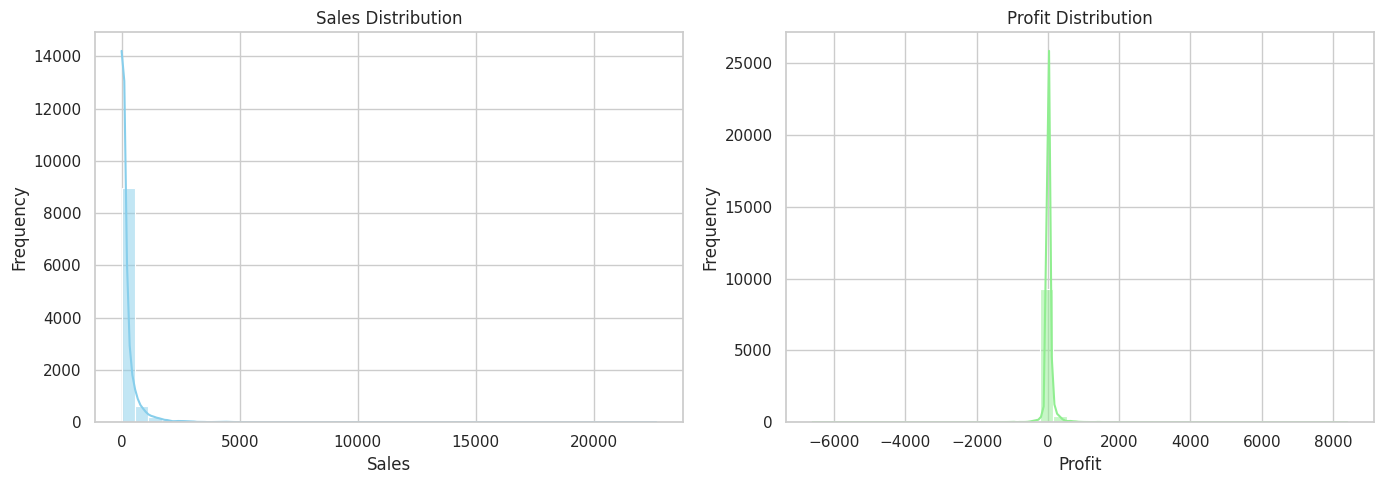

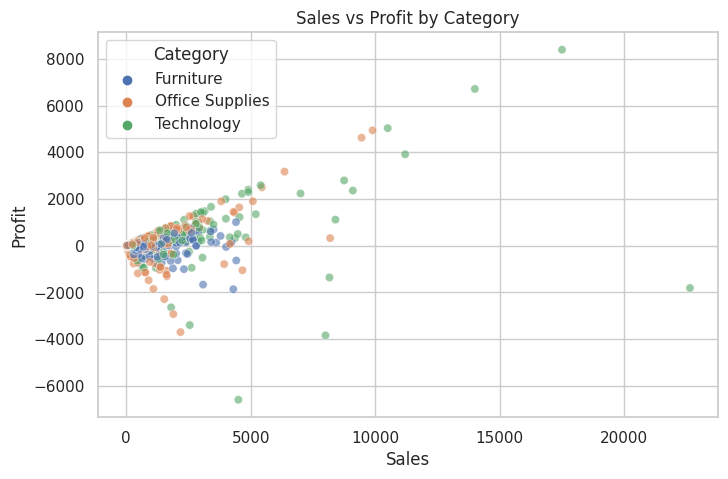

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Total sales and profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")

# Plotting distribution of Sales and Profit
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Sales'], bins=40, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Sales Distribution')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Frequency')

sns.histplot(df['Profit'], bins=40, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Profit Distribution')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot: Sales vs Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.6)
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

## Region-wise Sales and Profit Analysis

<Figure size 1000x600 with 0 Axes>

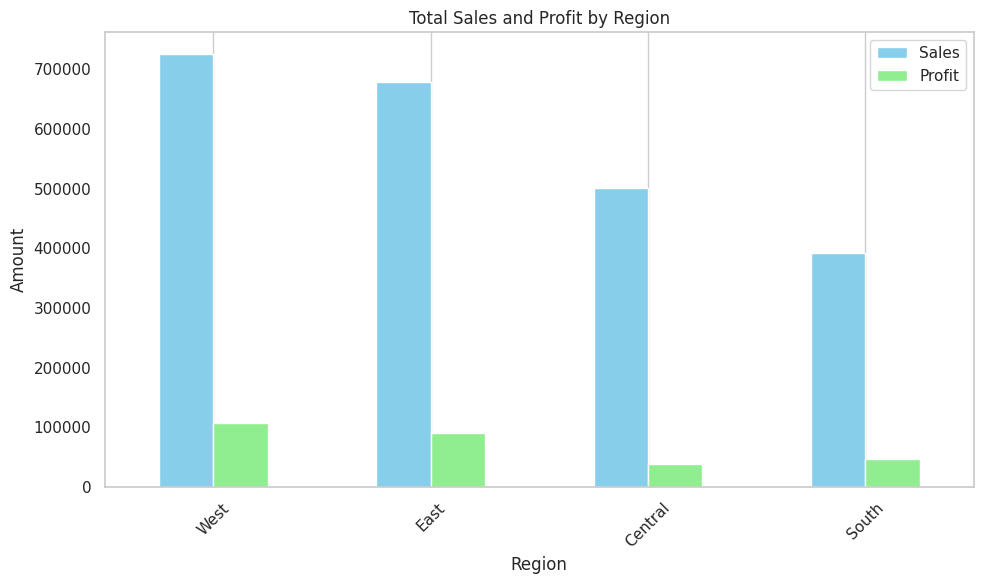

In [6]:
# Group data by Region and calculate total Sales and Profit
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
region_sales_profit.plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen'])
plt.title('Total Sales and Profit by Region')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Category-Level Aggregation

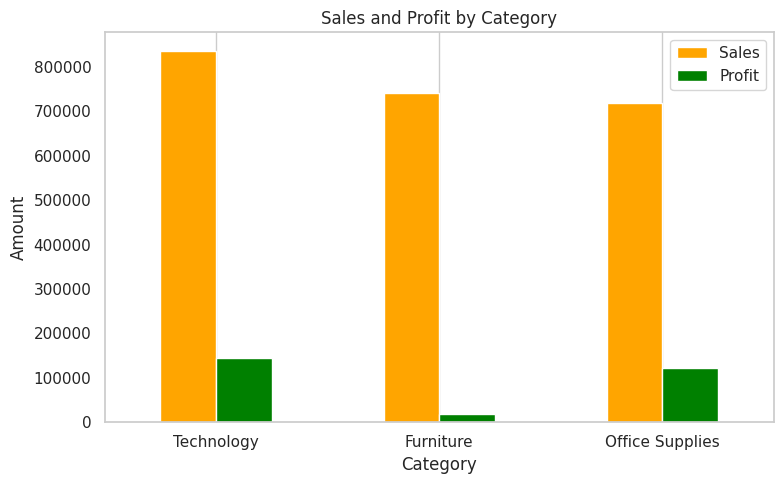

In [7]:
# Group by Category and sum Sales & Profit
category_data = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot
category_data.plot(kind='bar', figsize=(8, 5), color=['orange', 'green'])
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Sub-Category-Level Aggregation

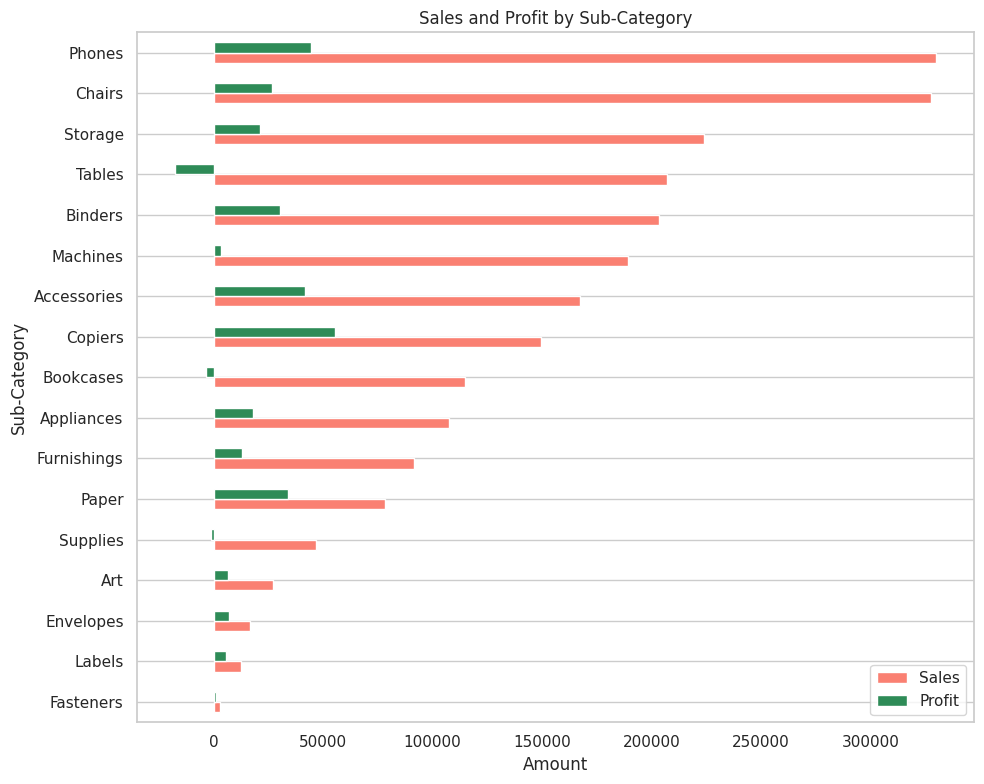

In [8]:
# Group by Sub-Category
subcat_data = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=True)

# Plot
subcat_data.plot(kind='barh', figsize=(10, 8), color=['salmon', 'seagreen'])
plt.title('Sales and Profit by Sub-Category')
plt.xlabel('Amount')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Time Series Analysis – Sales and Profit Over Time

In [9]:
print(df.columns)
print(df.head(1))

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit Margin', 'Discounted Price'],
      dtype='object')
      Ship Mode   Segment        Country       City     State  Postal Code  \
0  Second Class  Consumer  United States  Henderson  Kentucky        42420   

  Region   Category Sub-Category   Sales  Quantity  Discount   Profit  \
0  South  Furniture    Bookcases  261.96         2       0.0  41.9136   

   Profit Margin  Discounted Price  
0           0.16            261.96  


In [10]:
import numpy as np
import pandas as pd

# Add a fake 'Order Date' column for analysis purposes
date_range = pd.date_range(start='2018-01-01', end='2022-12-31', periods=len(df))
df['Order Date'] = date_range

# Now you can proceed with your time-based analysis
df['Month_Year'] = df['Order Date'].dt.to_period('M')

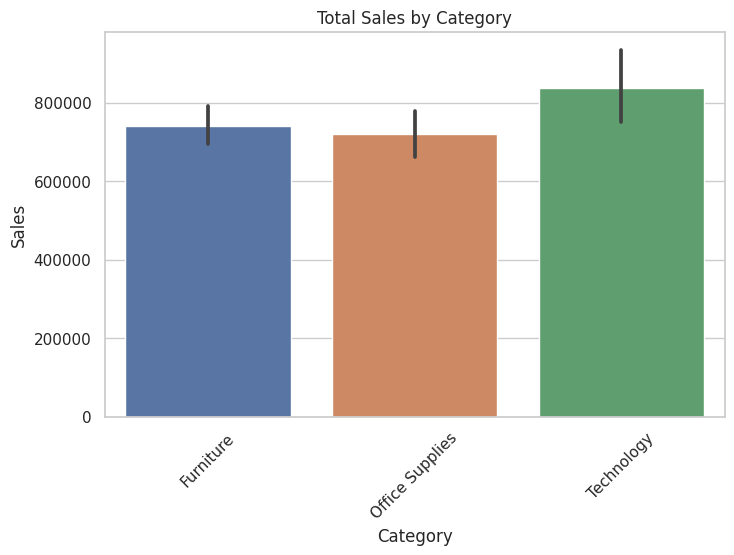

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot: Total Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Step 1: Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Extract Month-Year and store it in a new column
df['Month_Year'] = df['Order Date'].dt.to_period('M')

# Optional: Confirm the new column
print(df[['Order Date', 'Month_Year']].head())

                     Order Date Month_Year
0 2018-01-01 00:00:00.000000000    2018-01
1 2018-01-01 04:23:25.934242181    2018-01
2 2018-01-01 08:46:51.868484362    2018-01
3 2018-01-01 13:10:17.802726543    2018-01
4 2018-01-01 17:33:43.736968724    2018-01


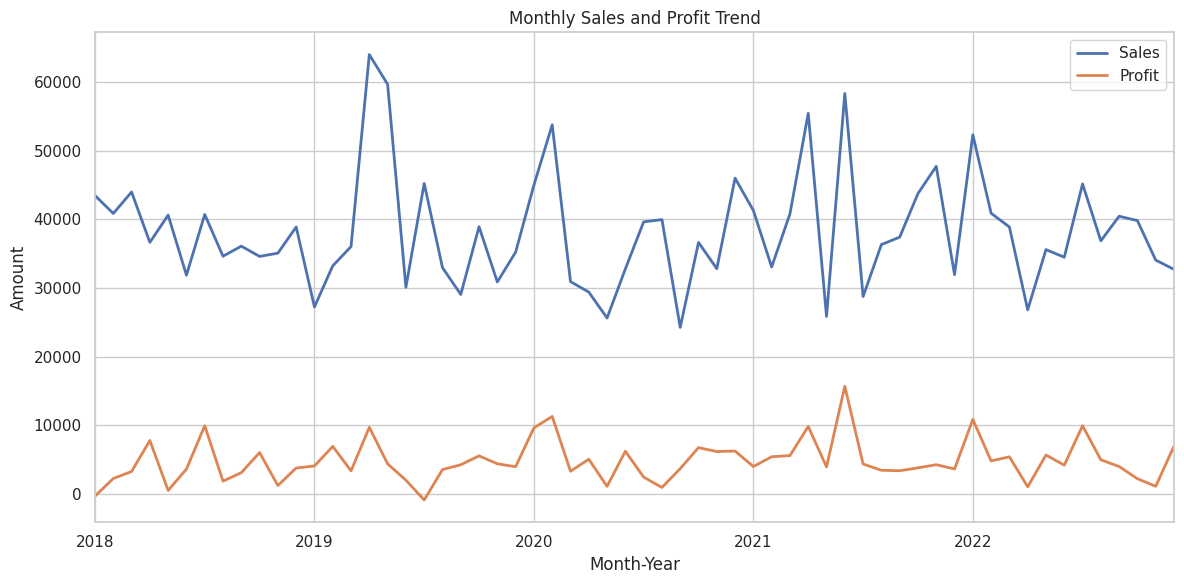

In [13]:
# Group by Month-Year
monthly_trend = df.groupby('Month_Year')[['Sales', 'Profit']].sum()

# Convert index to datetime for plotting
monthly_trend.index = monthly_trend.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
monthly_trend['Sales'].plot(label='Sales', linewidth=2)
monthly_trend['Profit'].plot(label='Profit', linewidth=2)
plt.title('Monthly Sales and Profit Trend')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Discount vs Profit Relationship

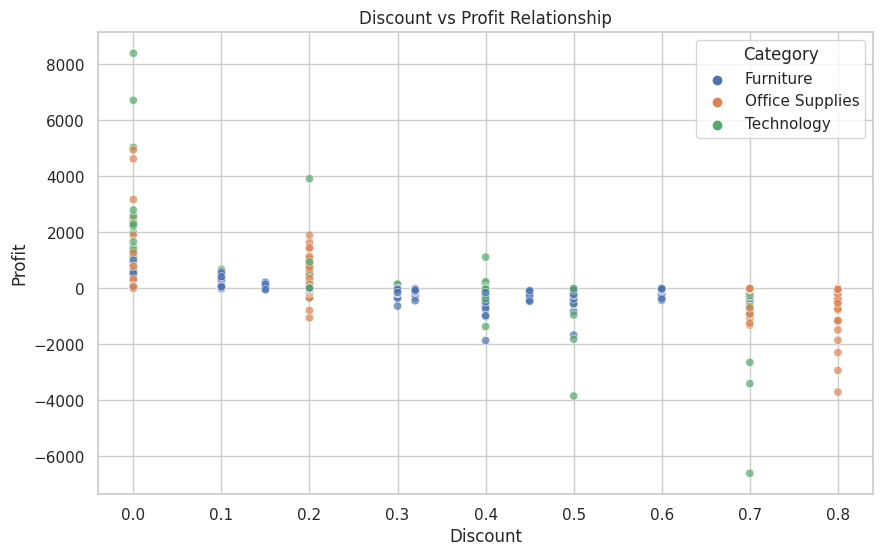

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', alpha=0.7)
plt.title('Discount vs Profit Relationship')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

## Top Cities and Regions by Sales

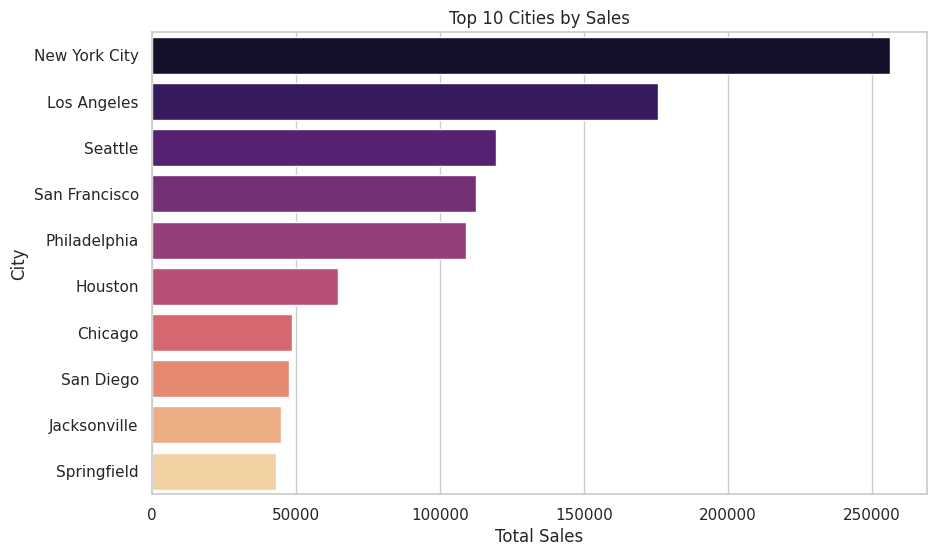

In [15]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

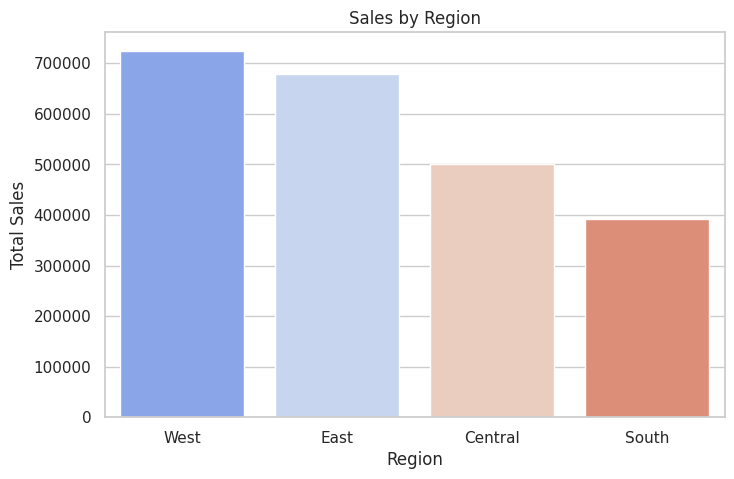

In [16]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## Monthly Sales Trend (Time Series Analysis)

In [17]:
# Ensure Order Date is in datetime format (if not done earlier)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a Month-Year column
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Month-Year and sum sales
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()

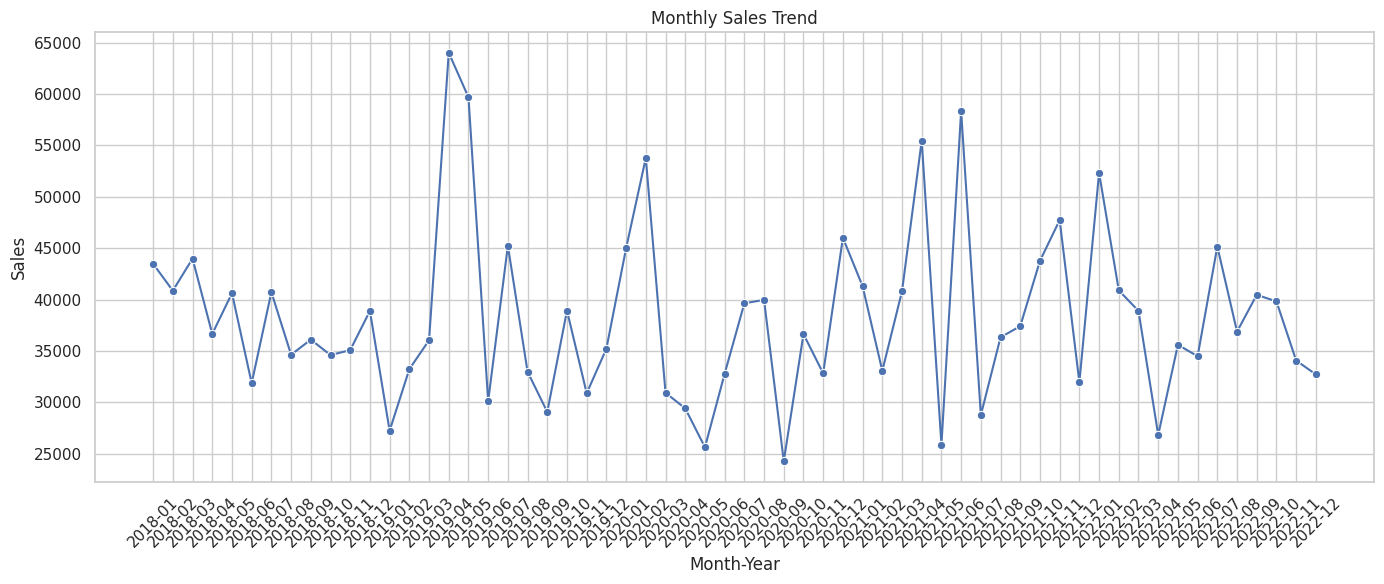

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Category & Sub-Category Profit Analysis

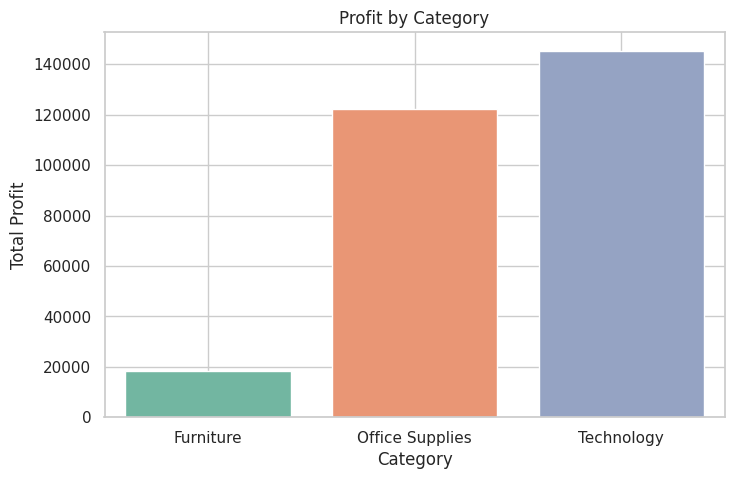

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df.groupby('Category')['Profit'].sum().reset_index(), x='Category', y='Profit', palette='Set2')
plt.title('Profit by Category')
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.grid(True)
plt.show()

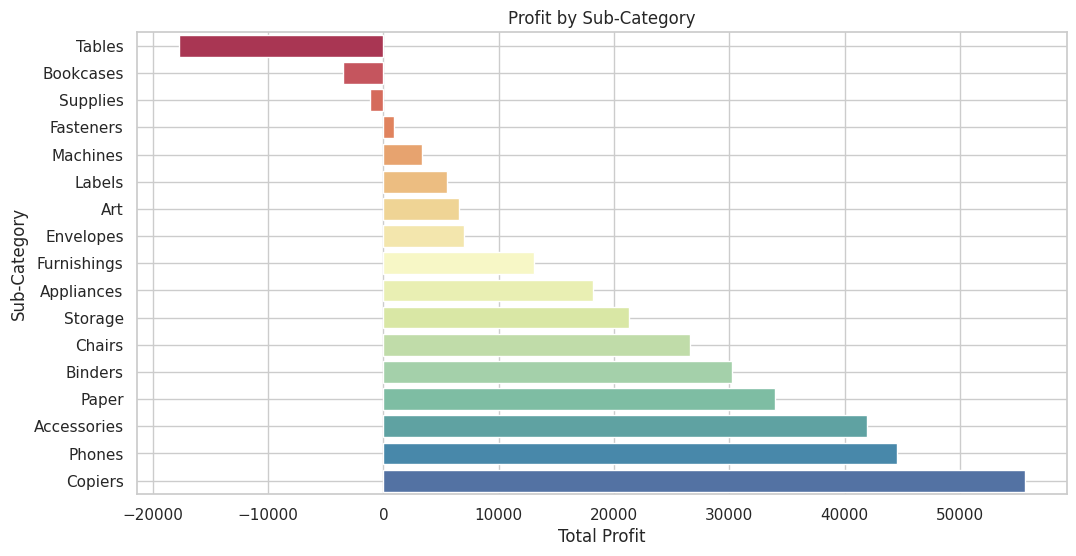

In [20]:
plt.figure(figsize=(12, 6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette='Spectral')
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.grid(True)
plt.show()

## Correlation Heatmap

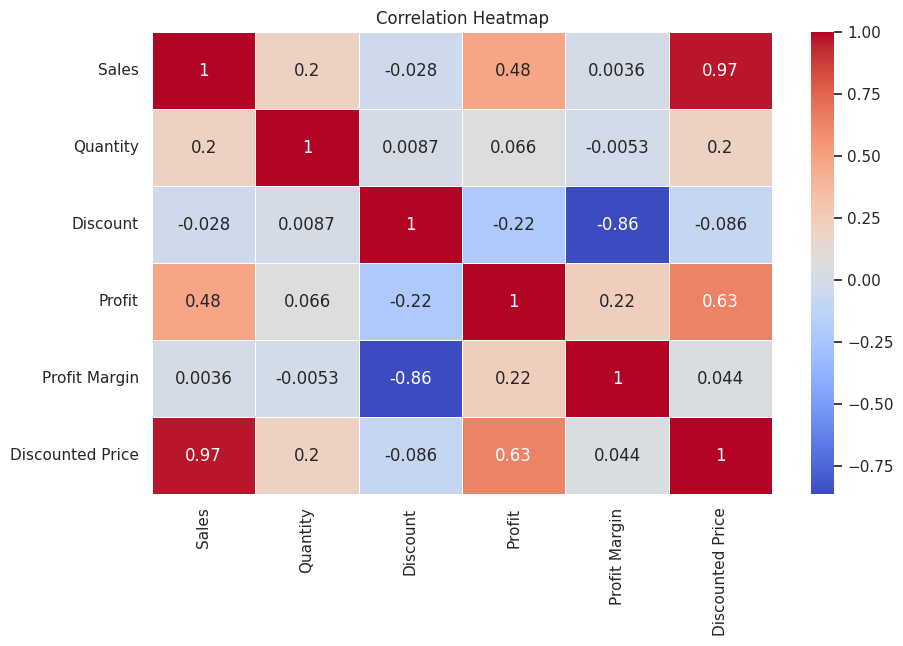

In [21]:
# Select numeric columns for correlation
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin', 'Discounted Price']
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

## Build a Simple Predictive Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Sales', 'Discount']]
y = df['Profit']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 62961.59278283619
R-squared Score: 0.17373600299745906


In [26]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

    Feature  Coefficient
0     Sales     0.179313
1  Discount  -231.816055


## Visualize Actual vs Predicted Profits

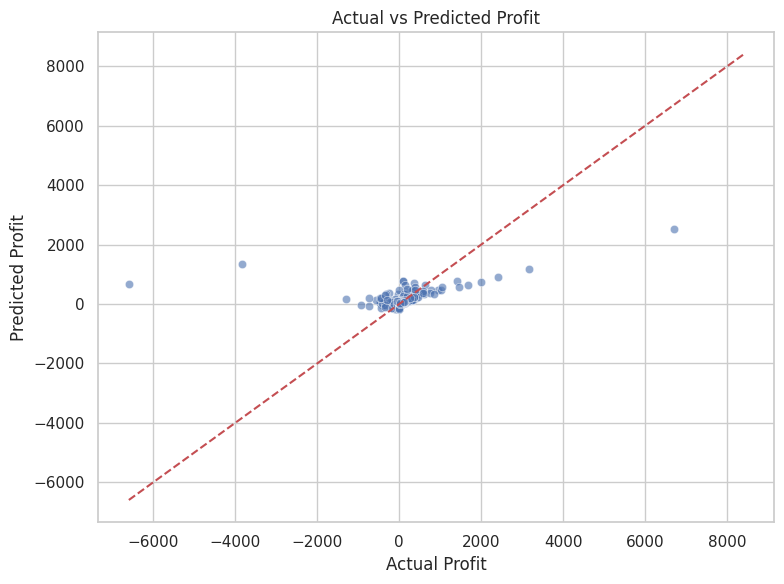

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()

In [28]:
df.to_csv("cleaned_superstore_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_superstore_data.csv'")

Cleaned dataset saved as 'cleaned_superstore_data.csv'


### 📌 Final Insights:

- **Top-Selling Category**: [Fill from your analysis]
- **Most Profitable Segment**: [Fill from segment analysis]
- **Key City for Sales**: [Fill from top cities plot]
- **Discount Impact**: Heavy discounts tend to reduce profit.
- **Modeling**: A basic linear regression model showed that Sales and Discount can give a rough estimate of Profit, but the R² score suggests more features or advanced modeling could improve predictions.

---

### ✅ Next Steps:

- Try more advanced models (e.g., XGBoost, Random Forest).
- Include additional features like Region, Category, or Shipping Time.
- Build a dashboard using tools like **Power BI**, **Tableau**, or **Plotly Dash**.